# Rossman Store Sales Prediction

## Steps:
1. Explatory Data Analysis


#### Used dataset is **rossmann store data**. It operates over 3,000 drug stores in 7 European countries. The challenge is to predict their daily sales for up to six weeks in advance.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
store = pd.read_csv('../data/store.csv')
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')


C:\Users\gejunkai\AppData\Local\Temp\ipykernel_63536\4003805015.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


View the graph of sales data from January 2013 to month 2015 for the store with serial number 1 to get a visual sense of the overall character of the change in the data.

In [58]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [36]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [37]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Display shapes of the datasets

In [38]:
print(train.shape, test.shape, store.shape)

(1017209, 9) (41088, 8) (1115, 10)


### Exploratory Data Analysis


<AxesSubplot:>

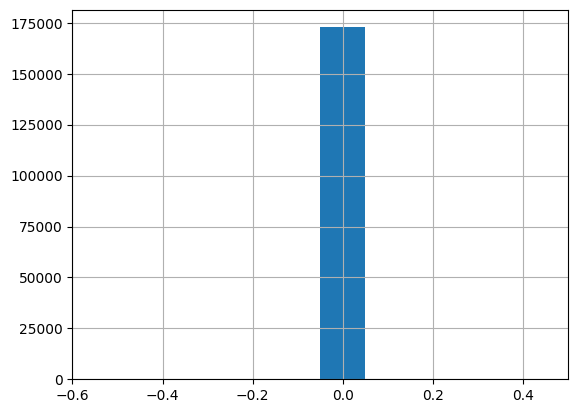

In [29]:
train.loc[train.Open==0].Sales.hist(align='left')

Finding: when the store is closed, the daily sales are necessarily 0.


The skewness of Sales is 1.5939220392699809


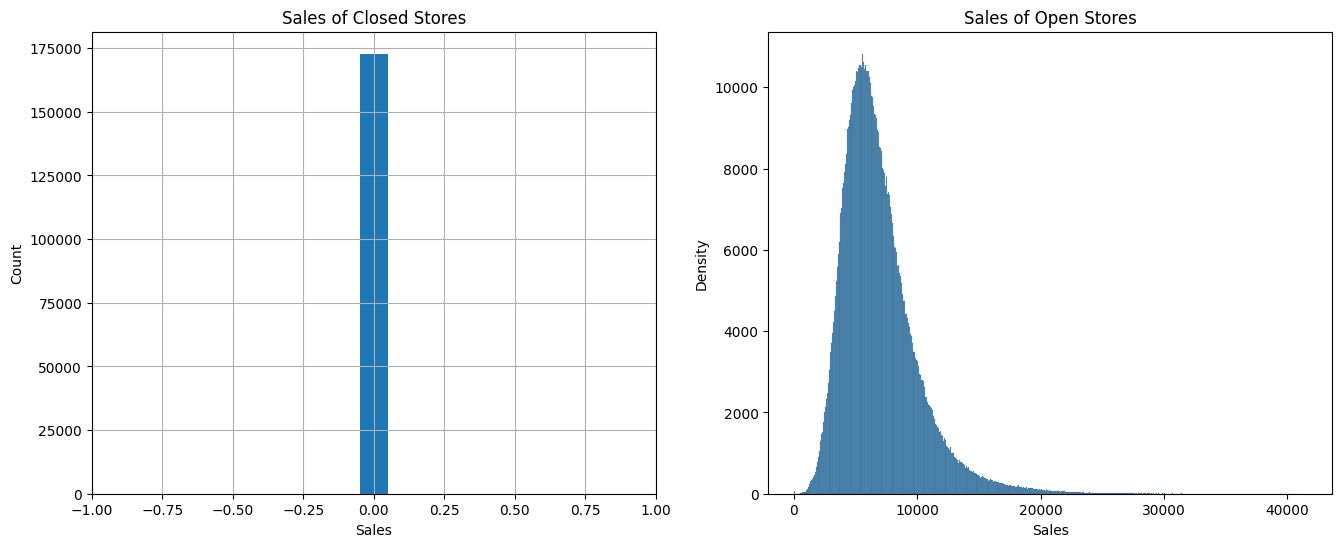

In [39]:
fig = plt.figure(figsize=(16,6))

# Sales of Closed Stores
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Count')
ax1.set_title('Sales of Closed Stores')
plt.xlim(-1,1) # Assuming this is relevant for your data; you might need to adjust this.
train.loc[train.Open==0].Sales.hist(align='left', ax=ax1)

# Sales of Open Stores with histplot
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Density')
ax2.set_title('Sales of Open Stores')
sns.histplot(train.loc[train.Open!=0].Sales, ax=ax2)  # kde=True adds the density line

# Calculating skewness
skewness = train.loc[train.Open!=0].Sales.skew()
print('The skewness of Sales is {}'.format(skewness))

After removing the data when the store is closed, re-plot the daily sales distribution when the store is opened. It can be found that the daily sales show an obvious skewed distribution, with a skewness of about , which is much larger than , and we will consider making preprocessing adjustments to the data distribution.

#### In the following, we only use the data when the store is open (Open!=0 ) for training.

In [40]:
train = train.loc[train.Open != 0]
train = train.loc[train.Sales > 0].reset_index(drop=True)
train.shape

(844338, 9)

### 2.1 Line graph

We have used matplotlib.pyplot to plot the sales data of the store with serial number from January 2013 to 2015 months.

In [41]:
print(train.columns)


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


<AxesSubplot:title={'center':'The Sales Data In Store 1'}, xlabel='Date'>

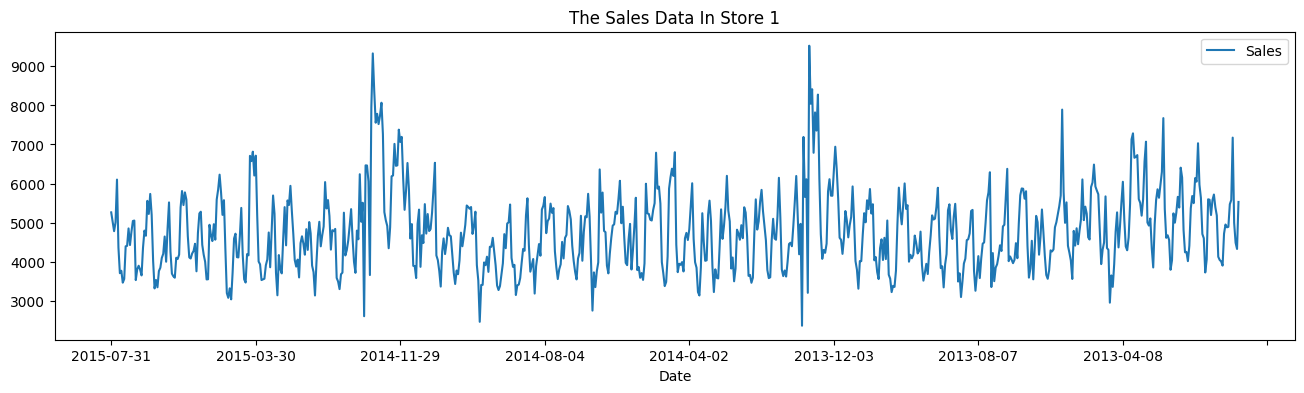

In [42]:
train.loc[train['Store']==1,['Date','Sales']].plot(x='Date',y='Sales',title='The Sales Data In Store 1',figsize=(16,4))

View the graph of sales data from January 2013 to month 2015 for the store with serial number 1 to get a visual sense of the overall character of the change in the data.

### 2.2 Plot of univariate distribution

In [48]:
print(train.loc[train['Store'] == 1, 'Sales'].isnull().sum())
print(train.loc[train['Store'] == 1, 'Sales'].dtype)


0
int64


<AxesSubplot:xlabel='Sales', ylabel='Count'>

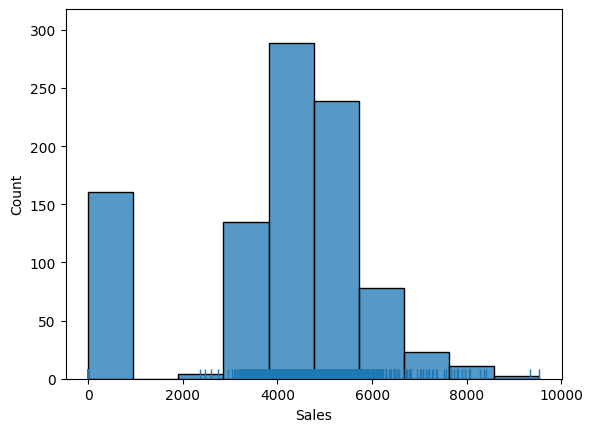

In [59]:
sns.histplot(train.loc[train['Store']==1, 'Sales'], bins=10)

# Add a rug plot
sns.rugplot(train.loc[train['Store']==1, 'Sales'])

### 2.3 Joint Distribution Plots of Binary Variables

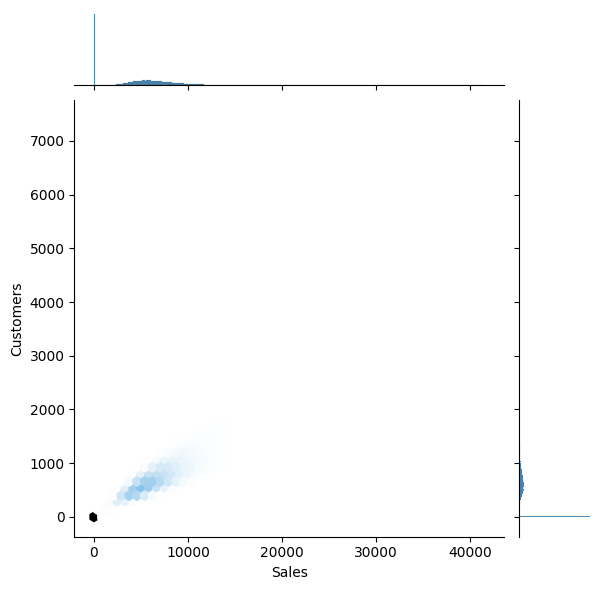

In [60]:
sns.jointplot(x=train["Sales"], y=train["Customers"], kind="hex")

Binary variable correlation analysis plotting can help us visualize the correlation between two columns of data, in the above figure we can easily observe that there is a certain linear relationship between customer flow and sales flow.

### 2.4 Heat map

Applied to the corr() function in Pandas, the correlation between each column of data is calculated. Here the correlation is the Pearson correlation coefficient

In [66]:
train_corr = train.corr(numeric_only=True)

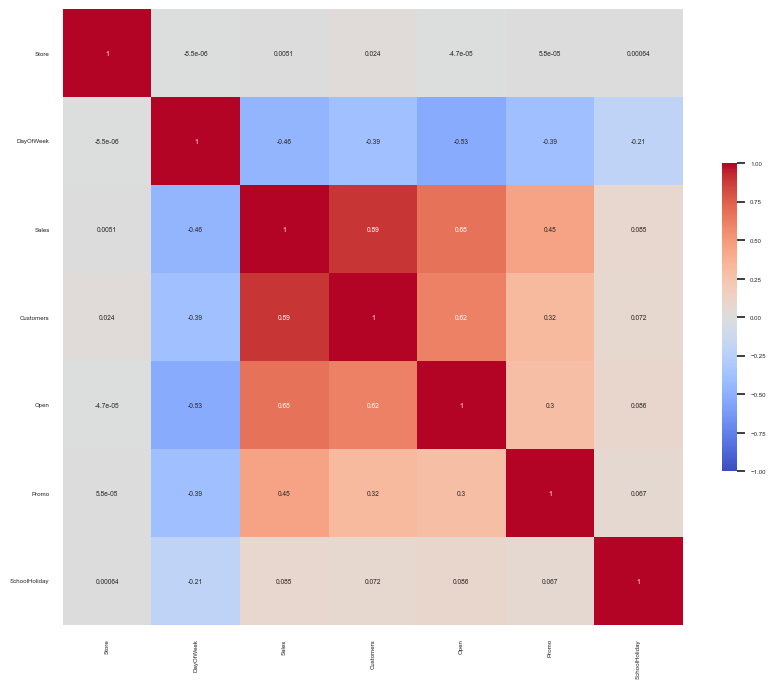

In [67]:
# Setting the canvas size and font size
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.4)

# Generate heat maps, adjust label rotation and color scale size
ax = sns.heatmap(
    train_corr,
    annot=True,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    cmap='coolwarm',
    cbar_kws={"shrink": 0.5}
)

# Rotating label
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

The above graph shows that many of the parameters have some positive or negative correlation with each other, meaning that there is some correlation between these data, which means that we can classify or regress these data using machine learning models.